In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import resample
from scipy.fft import fft, fftfreq
from scipy import stats

In [2]:
data_path = '/content/drive/MyDrive/TFM/WESAD/'
ids = [2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]
for i in ids:
    print(data_path + 'S' + str(i) + '/S' + str(i) + '.pkl')

/content/drive/MyDrive/TFM/WESAD/S2/S2.pkl
/content/drive/MyDrive/TFM/WESAD/S3/S3.pkl
/content/drive/MyDrive/TFM/WESAD/S4/S4.pkl
/content/drive/MyDrive/TFM/WESAD/S5/S5.pkl
/content/drive/MyDrive/TFM/WESAD/S6/S6.pkl
/content/drive/MyDrive/TFM/WESAD/S7/S7.pkl
/content/drive/MyDrive/TFM/WESAD/S8/S8.pkl
/content/drive/MyDrive/TFM/WESAD/S9/S9.pkl
/content/drive/MyDrive/TFM/WESAD/S10/S10.pkl
/content/drive/MyDrive/TFM/WESAD/S11/S11.pkl
/content/drive/MyDrive/TFM/WESAD/S13/S13.pkl
/content/drive/MyDrive/TFM/WESAD/S14/S14.pkl
/content/drive/MyDrive/TFM/WESAD/S15/S15.pkl
/content/drive/MyDrive/TFM/WESAD/S16/S16.pkl
/content/drive/MyDrive/TFM/WESAD/S17/S17.pkl


In [3]:
df_s2 = pd.read_pickle((data_path + "S2/S2.pkl"))

In [4]:
df_s2

{'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
          [ 0.92579997, -0.2216    , -0.55379999],
          [ 0.90820003, -0.21960002, -0.53920001],
          ...,
          [ 0.87179995, -0.12379998, -0.30419999],
          [ 0.87300003, -0.12339997, -0.30260003],
          [ 0.87020004, -0.12199998, -0.30220002]]),
   'ECG': array([[ 0.02142334],
          [ 0.02032471],
          [ 0.01652527],
          ...,
          [-0.00544739],
          [ 0.00013733],
          [ 0.0040741 ]]),
   'EMG': array([[-0.00444031],
          [ 0.00434875],
          [ 0.00517273],
          ...,
          [-0.01716614],
          [-0.02897644],
          [-0.02357483]]),
   'EDA': array([[5.25054932],
          [5.26733398],
          [5.24330139],
          ...,
          [0.36048889],
          [0.36582947],
          [0.365448  ]]),
   'Temp': array([[30.120758],
          [30.129517],
          [30.138214],
          ...,
          [31.459229],
          [31.484283

In [5]:
label = df_s2["label"]
df_label = pd.DataFrame(label)

In [6]:
w_bvp = df_s2["signal"]["wrist"]["BVP"]

In [7]:
df_bvp = pd.DataFrame(w_bvp)
df_bvp.shape

(389056, 1)

In [8]:
df_bvp.head(10)

,0
0,-59.37
1,-53.42
2,-44.40
3,-33.17
4,-20.79
5,-8.33
6,3.40
7,13.85
8,22.76
9,30.04


In [9]:
df_bvp.describe()

,0
count,389056.000000
mean,-0.000427
std,75.871334
min,-873.670000
25%,-19.670000
50%,3.010000
75%,19.032500
max,988.080000


In [10]:
# Resampling la columna BVP a la frecuencia de los datos de pecho
f_bvp = 64
f_chest = 700

# Se aplica la función resample de spicy.signal
resampled_bvp_data = resample(df_bvp, int(len(df_bvp) * f_chest / f_bvp))

In [11]:
# Comprueba la dimensión después de resampling
resampled_bvp_data.shape

(4255300, 1)

In [12]:
# Pasar a dataframe para luego combinar con el resto de columnas
df_resampled_bvp = pd.DataFrame(resampled_bvp_data)

In [13]:
df_resampled_bvp.head()

,0
0,-59.370000
1,-63.580766
2,-66.580843
3,-68.365462
4,-68.985094


In [15]:
# Compara los datos estadísticos con los datos originales
df_bvp.describe()

,0
count,389056.000000
mean,-0.000427
std,75.871334
min,-873.670000
25%,-19.670000
50%,3.010000
75%,19.032500
max,988.080000


In [16]:
# Son muy similares
df_resampled_bvp.describe()

,0
count,4.255300e+06
mean,-4.268280e-04
std,7.587125e+01
min,-8.736698e+02
25%,-1.967229e+01
50%,3.015541e+00
75%,1.903462e+01
max,9.966595e+02


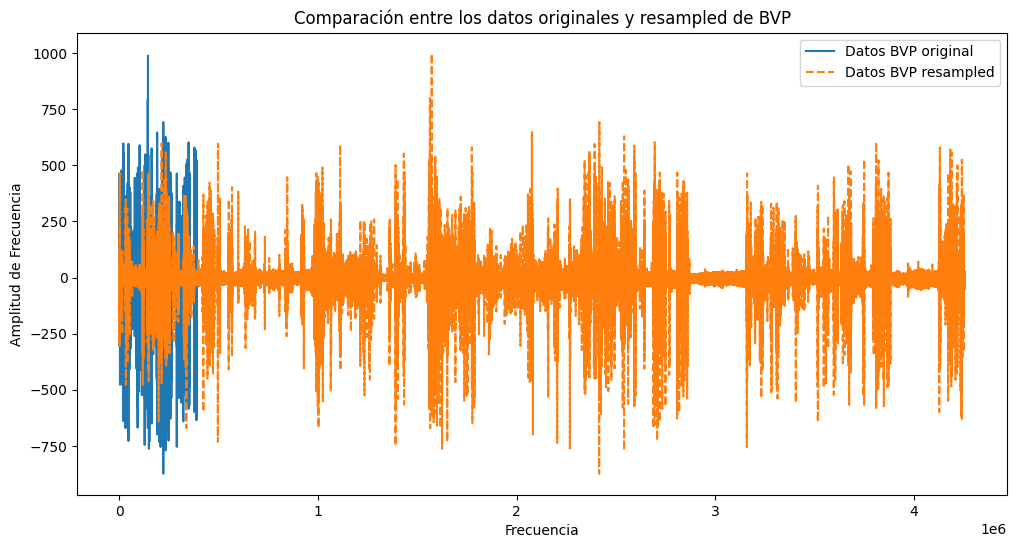

In [20]:
# Compararlos mediante gráficos
original_bvp_data = df_bvp[0].values
resampled_bvp_data = df_resampled_bvp[0].values

plt.figure(figsize=(12, 6))
plt.plot(original_bvp_data, label='Datos BVP original')
plt.plot(resampled_bvp_data, label='Datos BVP resampled', linestyle='--')
plt.legend()
plt.title('Comparación entre los datos originales y resampled de BVP')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud de Frecuencia')
plt.show()

# Gráfico de FFT
freq_original, psd_original = fftfreq(len(original_bvp_data), 1/f_bvp), fft(original_bvp_data)
freq_resampled, psd_resampled = fftfreq(len(resampled_bvp_data), 1/f_chest), fft(resampled_bvp_data)



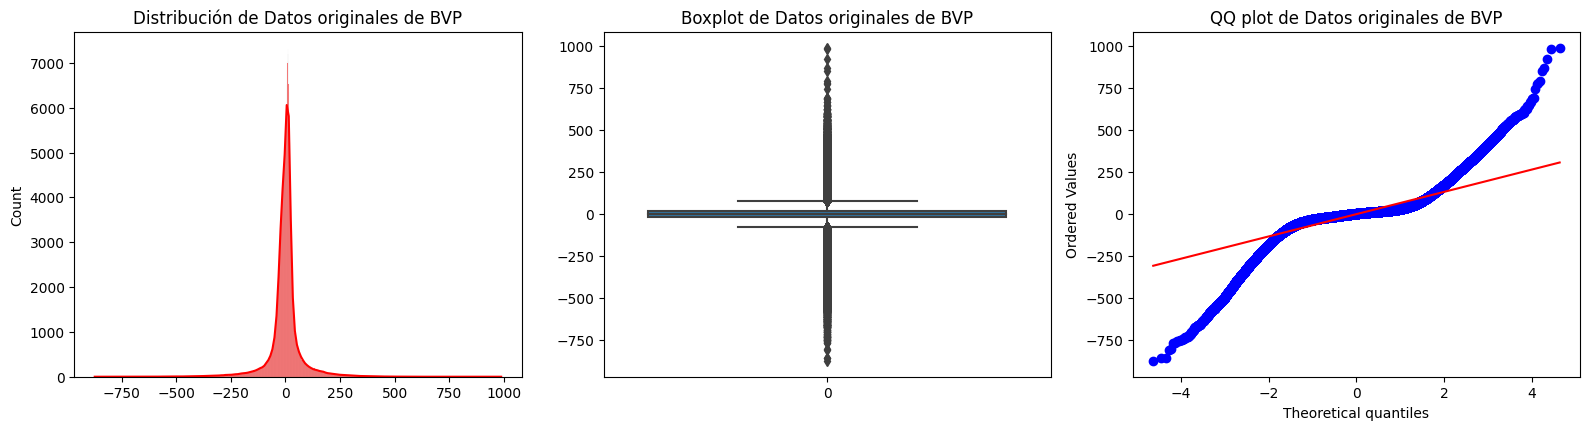

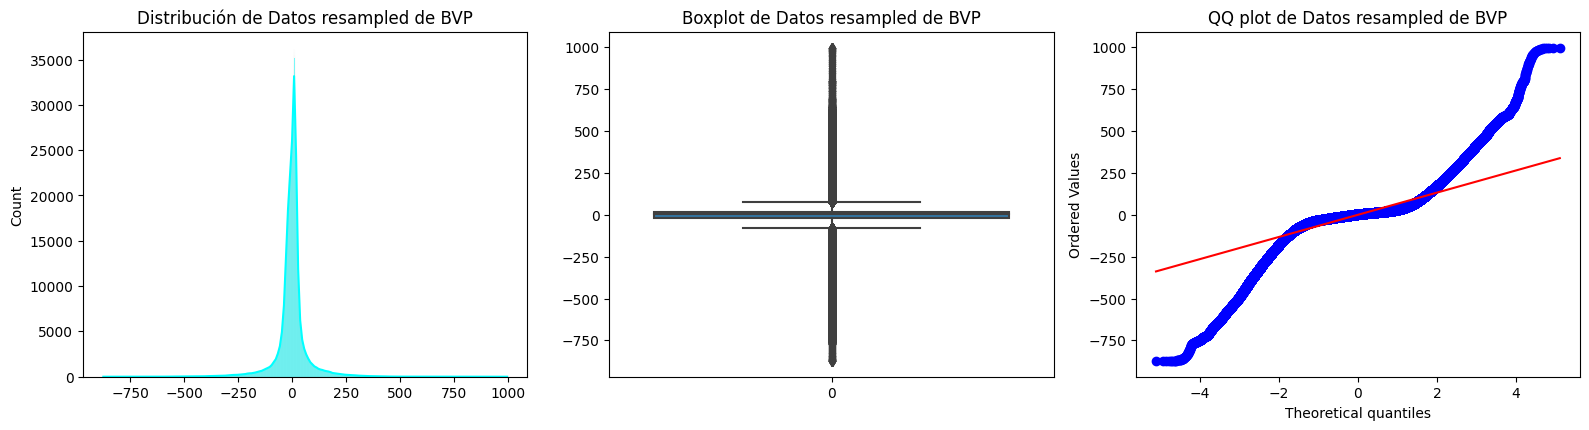

In [34]:
# Se pinta histogramas para ver distribución estadística
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
sns.histplot(original_bvp_data, kde=True, color='red', label='Original Data')
plt.title('Distribución de Datos originales de BVP')

# Boxplots
plt.subplot(2, 3, 2)
sns.boxplot(data=original_bvp_data)
plt.title('Boxplot de Datos originales de BVP')

# QQ plot
plt.subplot(2, 3, 3)
stats.probplot(original_bvp_data, dist='norm', plot=plt)
plt.title('QQ plot de Datos originales de BVP')

plt.tight_layout()
plt.show()

# La otra histogramas en la fila de abajo
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
sns.histplot(resampled_bvp_data, kde=True, color='cyan', label='Resampled Data')
plt.title('Distribución de Datos resampled de BVP')

plt.subplot(2, 3, 2)
sns.boxplot(data=resampled_bvp_data)
plt.title('Boxplot de Datos resampled de BVP')

plt.subplot(2, 3, 3)
stats.probplot(resampled_bvp_data, dist='norm', plot=plt)
plt.title('QQ plot de Datos resampled de BVP')

plt.tight_layout()
plt.show()

In [26]:
w_acc = df_s2["signal"]["wrist"]["ACC"]
w_eda = df_s2["signal"]["wrist"]["EDA"]
w_temp = df_s2["signal"]["wrist"]["TEMP"]

In [27]:
df_acc = pd.DataFrame(w_acc)
df_eda = pd.DataFrame(w_eda)
df_temp = pd.DataFrame(w_temp)

In [28]:
df_acc_x = df_acc[0]
df_acc_y = df_acc[1]
df_acc_z = df_acc[2]

In [29]:
f_acc = 32
f_eda_temp = 4
resampled_acc_x_data = resample(df_acc_x, int(len(df_acc_x) * f_chest / f_acc))
resampled_acc_y_data = resample(df_acc_y, int(len(df_acc_y) * f_chest / f_acc))
resampled_acc_z_data = resample(df_acc_z, int(len(df_acc_z) * f_chest / f_acc))
resampled_eda_data = resample(df_eda, int(len(df_eda) * f_chest / f_eda_temp))
resampled_temp_data = resample(df_temp, int(len(df_temp) * f_chest / f_eda_temp))

In [30]:
df_resampled_acc_x = pd.DataFrame(resampled_acc_x_data)
df_resampled_acc_y = pd.DataFrame(resampled_acc_y_data)
df_resampled_acc_z = pd.DataFrame(resampled_acc_z_data)
df_resampled_eda = pd.DataFrame(resampled_eda_data)
df_resampled_temp = pd.DataFrame(resampled_temp_data)

In [44]:
df_s2_wrist = pd.concat([df_resampled_acc_x, df_resampled_acc_y, df_resampled_acc_z, df_resampled_bvp, df_resampled_eda, df_resampled_temp, df_label], axis=1)
df_s2_wrist.columns = ['w_ACC_x', 'w_ACC_y', 'w_ACC_z', 'w_BVP', 'w_EDA', 'w_TEMP', 'label']
df_s2_wrist.head(10)

,w_ACC_x,w_ACC_y,w_ACC_z,w_BVP,w_EDA,w_TEMP,label
0,62.000000,-21.000000,107.000000,-59.370000,1.138257,35.410000,0
1,62.307282,-21.156211,109.270362,-63.580766,1.142849,35.414642,0
2,62.639848,-21.033768,111.011770,-66.580843,1.147382,35.419221,0
3,62.995836,-20.638036,112.206895,-68.365462,1.151857,35.423735,0
4,63.372326,-19.977788,112.844950,-68.985094,1.156272,35.428185,0
5,63.765356,-19.065064,112.921812,-68.540626,1.160628,35.432571,0
6,64.169967,-17.914997,112.440063,-67.175791,1.164924,35.436891,0
7,64.580260,-16.545586,111.408913,-65.067350,1.169159,35.441147,0
8,64.989485,-14.977423,109.844036,-62.413698,1.173334,35.445337,0
9,65.390138,-13.233394,107.767312,-59.422628,1.177448,35.449462,0


In [45]:
df_s2_wrist.insert(0, 'id', 2)

In [47]:
df_s2_wrist.shape

(4255300, 8)

In [46]:
df_s2_wrist.describe()

,id,w_ACC_x,w_ACC_y,w_ACC_z,w_BVP,w_EDA,w_TEMP,label
count,4255300.0,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06,4.255300e+06
mean,2.0,3.970145e+01,-4.073809e-01,1.899053e+01,-4.268280e-04,3.917433e-01,3.438695e+01,1.212370e+00
std,0.0,1.952085e+01,3.320659e+01,2.500344e+01,7.587125e+01,3.292288e-01,1.045318e+00,1.606596e+00
min,2.0,-1.522367e+02,-1.419849e+02,-1.479421e+02,-8.736698e+02,-8.894989e-02,3.230351e+01,0.000000e+00
25%,2.0,2.100959e+01,-1.202223e+01,8.768587e+00,-1.967229e+01,1.692509e-01,3.367944e+01,0.000000e+00
50%,2.0,4.376960e+01,5.306524e+00,1.697981e+01,3.015541e+00,2.361893e-01,3.424445e+01,0.000000e+00
75%,2.0,5.699604e+01,2.293330e+01,3.654062e+01,1.903462e+01,5.196283e-01,3.540991e+01,2.000000e+00
max,2.0,1.742576e+02,1.070634e+02,1.467597e+02,9.966595e+02,1.745638e+00,3.597752e+01,7.000000e+00


In [32]:
df_s2_wrist_filt = df_s2_wrist[df_s2_wrist["label"].isin([1,2,3])]
df_s2_wrist_filt.describe()

,w_ACC_x,w_ACC_y,w_ACC_z,w_BVP,w_EDA,w_TEMP,label
count,1.484700e+06,1.484700e+06,1.484700e+06,1.484700e+06,1.484700e+06,1.484700e+06,1.484700e+06
mean,4.004718e+01,-4.169438e+00,6.108956e+00,2.474988e-02,4.482403e-01,3.483431e+01,1.631306e+00
std,1.901420e+01,3.727405e+01,2.445031e+01,6.497322e+01,3.712487e-01,1.091830e+00,7.576988e-01
min,-8.777252e+01,-1.419849e+02,-9.360245e+01,-7.629081e+02,7.319591e-02,3.256560e+01,1.000000e+00
25%,1.745008e+01,-5.784408e+01,-7.225820e+00,-1.815347e+01,1.299934e-01,3.397035e+01,1.000000e+00
50%,4.685333e+01,1.101338e+01,1.355286e+01,2.715363e+00,2.475930e-01,3.561121e+01,1.000000e+00
75%,5.630455e+01,2.391910e+01,2.068797e+01,1.759020e+01,7.157164e-01,3.581029e+01,2.000000e+00
max,1.434579e+02,7.263490e+01,1.165692e+02,5.966061e+02,1.650252e+00,3.597752e+01,3.000000e+00
